# Bayesian Gaussian Mixture (Wine Clustering)

## Import libraries.

In [2]:
import pandas as pd
import numpy as np
import scipy as sp
from scipy.stats import gaussian_kde
import xlrd
import xlsxwriter
import itertools
from sklearn.decomposition import PCA
from sklearn.mixture import BayesianGaussianMixture
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from matplotlib import rc
import matplotlib.gridspec as gridspec
from matplotlib.pyplot import cm
from matplotlib.ticker import NullFormatter
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
plt.rcParams['lines.linewidth'] = 1.0
plt.rcParams['font.size'] = 6.0
plt.rcParams['axes.titlesize'] = 6.0
from matplotlib.ticker import FormatStrFormatter

## Define helper functions.

In [3]:
# Define function to draw ellipses.
def plot_ellipses(ax, weights, means, covars):
    for n in range(means.shape[0]):
        eig_vals, eig_vecs = np.linalg.eigh(covars[n])
        unit_eig_vec = eig_vecs[0] / np.linalg.norm(eig_vecs[0])
        angle = np.arctan2(unit_eig_vec[1], unit_eig_vec[0])
        # Ellipse needs degrees
        angle = 180 * angle / np.pi
        # eigenvector normalization
        eig_vals = 2 * np.sqrt(2) * np.sqrt(eig_vals)
        ell = mpl.patches.Ellipse(means[n], eig_vals[0], eig_vals[1],
                                  180 + angle, edgecolor='black')
        ell.set_clip_box(ax.bbox)
        ell.set_alpha(weights[n])
        ell.set_facecolor('#56B4E9')
        ax.add_artist(ell)

## Import data.
The dataset can be found on the UCI Machine Learning Repository: http://archive.ics.uci.edu/ml/datasets/Wine.

In [4]:
filename = "wine.csv"
data = pd.read_csv(filename, sep=';',header=0,index_col=False)
X = data.drop(columns=["Class"])

# We want to cluster wines.
data.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,Class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [23]:
# Perform dimensionality reduction.
dim_red = PCA(n_components = 2, whiten=True)
X_t = dim_red.fit_transform(X)

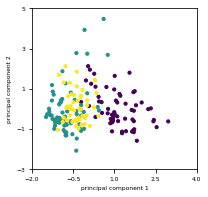

In [28]:
# Draw scatter plot.
fig = plt.figure(figsize=(2.95,2.95))
ax = fig.add_subplot(111)
ax.scatter(X_t[:,0], X_t[:,1], c=data["Class"], cmap=plt.cm.viridis, s=10, alpha=1.0)
ax.set_xlim(-2, 4)
ax.set_ylim(-3, 5)
ax.set_xlabel('principal component 1')
ax.set_ylabel('principal component 2')
ax.set_xticks(np.round(np.linspace(-2,4,5),2))
ax.set_yticks(np.round(np.linspace(-3,5,5),2))
plt.savefig('./figures/scatter',dpi=900,transparent=True,orientation='landscape',bbox_inches='tight')
plt.show()

## Define model.

**weight_concentration_prior_type: str, defaults to "dirichlet_process".**
String describing the type of the weight concentration prior. Must be one of:

> "dirichlet_process" (using the Stick-breaking representation)

>"dirichlet_distribution" (can favor more uniform weights)



**weight_concentration_prior: float / None, optional.**

The dirichlet concentration of each component on the weight distribution (Dirichlet). This is commonly called gamma in the literature. The higher concentration puts more mass in the center and will lead to more components being active, while a lower concentration parameter will lead to more mass at the edge of the mixture weights simplex. The value of the parameter must be greater than 0. If it is None, it’s set to 1. / n_components.

In [45]:
bgm = BayesianGaussianMixture(n_components=3, 
                              init_params="kmeans",
                              covariance_type="full",
                              weight_concentration_prior=1e5,
                              weight_concentration_prior_type="dirichlet_process",
                              random_state=2)
bgm.fit(X)
y = bgm.predict(X)

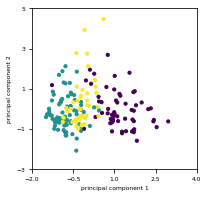

In [46]:
# Draw scatter plot.
fig = plt.figure(figsize=(2.95,2.95))
ax = fig.add_subplot(111)
ax.scatter(X_t[:,0], X_t[:,1], c=y, cmap=plt.cm.viridis, s=10, alpha=1.0)
ax.set_xlim(-2, 4)
ax.set_ylim(-3, 5)
ax.set_xlabel('principal component 1')
ax.set_ylabel('principal component 2')
ax.set_xticks(np.round(np.linspace(-2,4,5),2))
ax.set_yticks(np.round(np.linspace(-3,5,5),2))
plt.savefig('./figures/scatter_fit',dpi=900,transparent=True,orientation='landscape',bbox_inches='tight')
plt.show()